## DANE

In [1]:
using LinearAlgebra, Plots, PrettyTables

n = 100 # liczba punktów dyskretyzacji
k = 4
m = 1
A = -4π
B = 3π
x = collect(range(A, B, length=n))
y = exp.(-k*sin.(m*x)) .+ k*sin.(m*x) .- 1

N = [10,11,12,13,15,16, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000] # liczba punktów dyskretyzacji
X = [collect(range(A, B, length=n)) for n in N]
Y = [exp.(-k*sin.(m*x)) .+ k*sin.(m*x) .- 1 for x in X]

17-element Vector{Vector{Float64}}:
 [0.0, 1.6475979853414882, 46.43984520271717, 2.4954027283826874, 1.5597237496508765, 1.5597237496508747, 2.495402728382688, 46.43984520271717, 1.6475979853414908, 0.0]
 [0.0, 2.275386169065295, 40.086268283583635, 0.5265923006858135, 1.446401416353872, 49.598150033144236, 1.4464014163538725, 0.5265923006858131, 40.086268283583635, 2.275386169065295, 0.0]
 [0.0, 2.6648189977781547, 16.52982457200514, 0.9592378822017658, 2.9783625021741407, 5.53082936469581, 5.530829364695803, 2.9783625021741407, 0.9592378822017666, 16.529824572005182, 2.6648189977781565, 0.0]
 [0.0, 2.884693427738091, 4.389056098930644, 13.090401553811693, 2.4954027283826874, 0.3904044683137875, 49.598150033144236, 0.3904044683137873, 2.495402728382688, 13.090401553811704, 4.389056098930662, 2.884693427738091, 0.0]
 [0.0, 3.018315638888734, 0.0, 49.598150033144236, 0.0, 3.018315638888734, 0.0, 49.598150033144236, 0.0, 3.018315638888734, 0.0, 49.598150033144236, -1.1102230246251565e-1

## APROKSYMACJE

In [2]:
# aproksymacja wielomianowa
function poly_approx(n::Int, x::Vector, y::Vector)
    X = zeros(length(x), n+1)
    for i in 0:n
        X[:, i+1] = x.^i
    end
    theta = X \ y
    x_appr = range(x[1], x[end], length=100)
    y_appr = zeros(length(x_appr))
    for i in 0:n
        y_appr .+= theta[i+1] * x_appr.^i
    end
    return x_appr, y_appr
end

# aproksymacja trygonometryczna
function trig_approx(n::Int, x::Vector, y::Vector)
    X = zeros(length(x), 2n+1)
    for i in 1:n
        X[:, 2*i-1] = sin.(i*x)
        X[:, 2*i] = cos.(i*x)
    end
    X[:, end] = ones(length(x))
    theta = X \ y
    x_appr = range(x[1], x[end], length=100)
    y_appr = zeros(length(x_appr))
    for i in 1:n
        y_appr .+= theta[2*i-1] * sin.(i*x_appr) .+ theta[2*i] * cos.(i*x_appr)
    end
    y_appr .+= theta[end]
    return x_appr, y_appr
end

trig_approx (generic function with 1 method)

In [3]:
# aproksymacja wielomianowa z różnymi stopniami wielomianów
poly_x_appr = []
poly_y_appr = []
poly_errors = []
for i in 1:100
    x_appr, y_appr = poly_approx(i, x, y)
    push!(poly_x_appr, x_appr)
    push!(poly_y_appr, y_appr)
    push!(poly_errors, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

# aproksymacja trygonometryczna z różnymi liczbami funkcji
trig_x_appr = []
trig_y_appr = []
trig_errors = []
for i in 1:100
    x_appr, y_appr = trig_approx(i, x, y)
    push!(trig_x_appr, x_appr)
    push!(trig_y_appr, y_appr)
    push!(trig_errors, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

In [4]:
# aproksymacja wielomianowa z różną liczbą punktów dyskretyzacji
poly_Xi_appr = []
poly_Yi_appr = []
poly_errorsi = []
n = 13
for i in 1:length(N)
    x_appr, y_appr = poly_approx(n, X[i], Y[i])
    push!(poly_Xi_appr, x_appr)
    push!(poly_Yi_appr, y_appr)
    push!(poly_errorsi, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

# aproksymacja trygonometryczna z różną liczbą punktów dyskretyzacji
trig_Xi_appr = []
trig_Yi_appr = []
trig_errorsi = []
for i in 1:length(N)
    x_appr, y_appr = trig_approx(n, X[i], Y[i])
    push!(trig_Xi_appr, x_appr)
    push!(trig_Yi_appr, y_appr)
    push!(trig_errorsi, norm(y_appr - (exp.(-k*sin.(m*x_appr)) .+ k*sin.(m*x_appr) .- 1), 2))
end

## Błąd

In [5]:
pretty_table([1:length(poly_errors) poly_errors trig_errors], header = ["liczba funkcji bazowych", "aproksymacja wielomianowa", "aproksymacja trygonometryczna"], backend = Val(:html))

liczba funkcji bazowych,aproksymacja wielomianowa,aproksymacja trygonometryczna
1,143.131,99.3393
2,140.059,49.5926
3,140.059,20.6632
4,137.163,7.21952
5,137.163,2.20958
6,136.69,0.582781
7,136.69,0.139193
8,128.74,0.0292903
9,128.74,0.00570781
10,101.247,0.000995909


## Różna liczba punktów dyskretyzacji

In [6]:
pretty_table([N poly_errorsi trig_errorsi], header = ["liczba punktów dyskretyzacji", "aproksymacja wielomianowa", "aproksymacja trygonometryczna"], backend = Val(:html))

liczba punktów dyskretyzacji,aproksymacja wielomianowa,aproksymacja trygonometryczna
10,4107.69,92.925
11,2.41725e5,53.5503
12,2788.57,155.456
13,12530.2,127.488
15,470.978,133.072
16,360.782,120.726
20,95.1461,110.412
30,92.8285,9.00146e-6
40,92.814,6.39091e-6
50,92.8104,101.329


## WYKRESY

### różna liczba funkcji bazowych

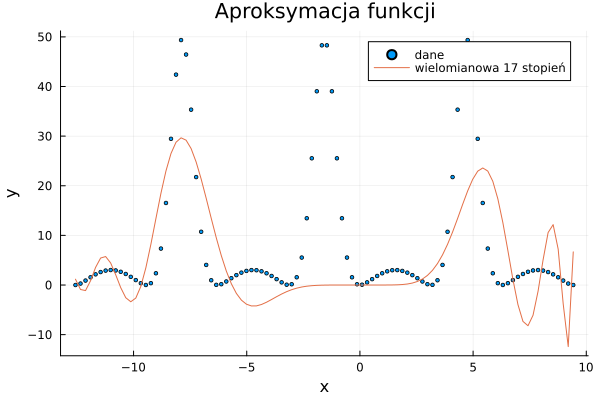

In [7]:
plots = []
for i in 1:100
    scatter(x, y, label="dane", markersize=2)
    plot!(poly_x_appr[i], poly_y_appr[i], label="wielomianowa $(i) stopień")
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    push!(plots,plot!())
end
savefig(plots[18],"plots/AprPolFirstBad")
plots[17]

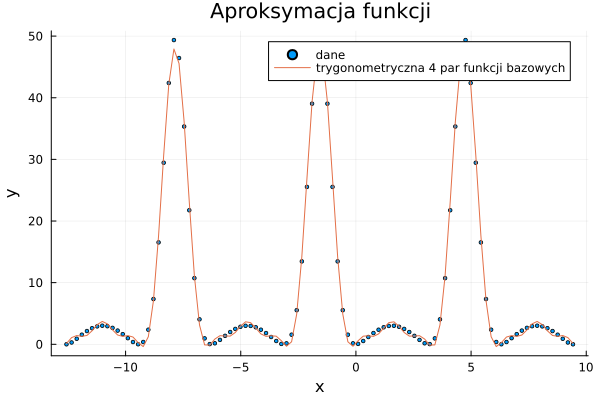

In [17]:
plots = []
for i in 1:100
    scatter(x, y, label="dane", markersize=2)
    plot!(trig_x_appr[i], trig_y_appr[i], label="trygonometryczna $i par funkcji bazowych")
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    push!(plots,plot!())

end
my_n = 6
savefig(plots[my_n], "plots/AprTriBaz$my_n")
plots[4]

### różna liczba punktów dyskretyzacji

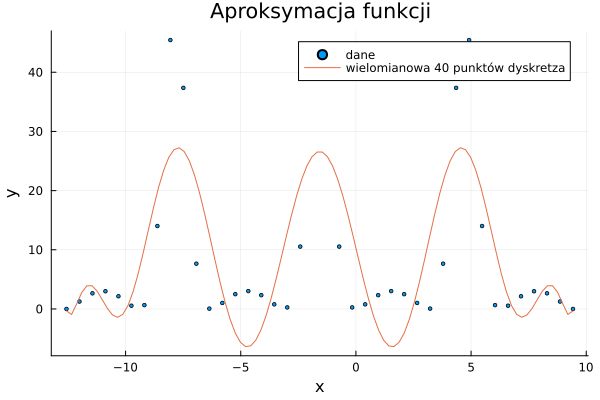

In [9]:
plots = []
for i in 1:length(N)
    scatter(X[i], Y[i], label="dane", markersize=2)
    plot!(poly_Xi_appr[i], poly_Yi_appr[i], label="wielomianowa $(N[i]) punktów dyskretza")
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    push!(plots,plot!())

end
plots[9]
# savefig(plots[6], "plots/AprPol15")

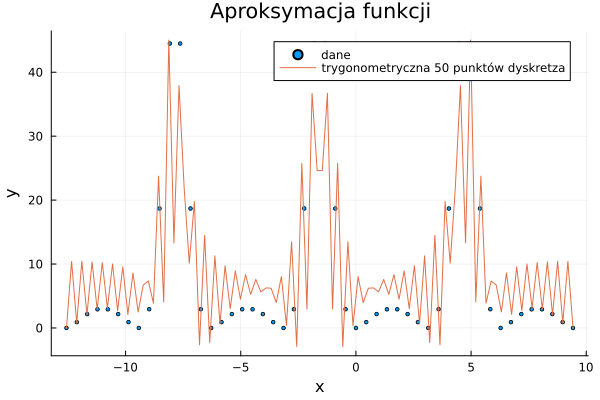

In [10]:
plots = []
for i in 1:length(N)
    scatter(X[i], Y[i], label="dane", markersize=2)
    plot!(trig_Xi_appr[i], trig_Yi_appr[i], label="trygonometryczna $(N[i]) punktów dyskretza")
    title!("Aproksymacja funkcji")
    xlabel!("x")
    ylabel!("y")
    push!(plots,plot!())

end
savefig(plots[10],"plots/AprTriWhatThe")
plots[10]

troche oddechu //efekt grungiego
przygotować każdy z was inna funkcja co się stało przybliżając funkcje
co się gdzie działo

przbliżanie trygonometrycznymi

wprowadzenie teeroetyczne do sprawka